# Neural Network Primer
"Deep learning" has taken the valley by storm since the mid 2000's, and it goes without saying no longer niche tech. AI-fever has breached the semiconductor field, sprouting efforts to harness the power of deep learning to advance nanofabrication projects beyond our present limits. My group has been developing deep learning applications for the past few years, and has us excited for its recent rise in ubiquity. "Deep learning", "neural networks" and the catch-all "AI" is increasingly on the lips of administrators, recruitors, and executives, but surprisingly few are talking about *why* the technology is revolutionary, *how* it distinguishes itself from machine learning, or even *what* it actually is without making a Skynet reference. With further training and discussion, its my hope that our BU will continue to recognize the value for deep learning applications in not just our software business, but in our R&D data.

While deep learning as a field is filled with some of the brightest minds in math, statistics, and computer science, understanding of basic neural networks is surprisingly accessible, and doesn't necessarily require special hardware to train a modest to moderate deep learning application on our own research databases.

I briefly touched on computation graphs in an earlier tutorial. Consider modeling a dataset with a simple linear regressor $z$. Now consider applying some activation function $g$ to this regessor, yielding some output vector $\hat{y}$.

$\large Linear\space Regressor: \space z = w^Tx + b $

$\large Activation\space Function: \space a = g(z)$

$ \large Output: \space \hat{y}=a$

If there are three input variables to fit, in a linear-type model, the computations would simply flow in this kind of graph.

$ \large\left[\begin{array}{cc}x_1 & \\ x_2 & \\ x_3\end{array}\right] \to \large [z = w^T\cdot x + b] \space\to\space [a = g(z)] \to \hat{y}$

This would be the scheme to build a simple binary classifier. Graphically, this can be represented as the crude OneNote drawing below. 

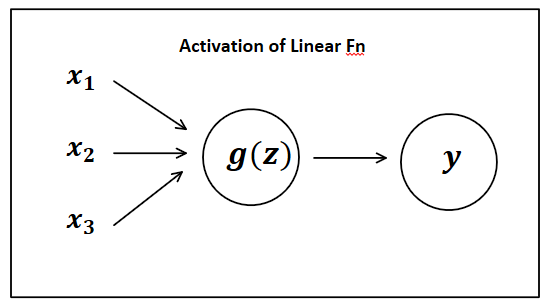

In [1]:
from IPython.display import Image
Image("images/linear_comp.PNG")

In a nerual network, this flow of computation is simply repeated across a specified number of linear models, each being passed to an activation function. In a neural network, these are called nodes or neurons (with the analogy being made that these nodes behave similarly to that of neuronal activity in the brain). So the first layer of a neural network with four nodes would be computed as

$\large z_1^{[1]} = w_1^{[1]T}\cdot x + b_1^{[1]}, \space a_1^{[1]} = g(z_1^{[1]})$

$\large z_2^{[1]} = w_2^{[1]T}\cdot x + b_2^{[1]}, \space a_2^{[1]} = g(z_2^{[1]})$

$\large z_3^{[1]} = w_3^{[1]T}\cdot x + b_3^{[1]}, \space a_3^{[1]} = g(z_3^{[1]})$

$\large z_4^{[1]} = w_4^{[1]T}\cdot x + b_4^{[1]}, \space a_4^{[1]} = g(z_4^{[1]})$

Where in  $ \large a_i^{[l]}$ 
 * $l$: layer, 
 * $i$: node

The resulting output of these activation functions applied across the nodes, $A_1$, are *again* passed, in the one-hidden-layer case, to a single function, resulting in output of a scalar. This can be respresented graphically as another crude OneNote drawing.

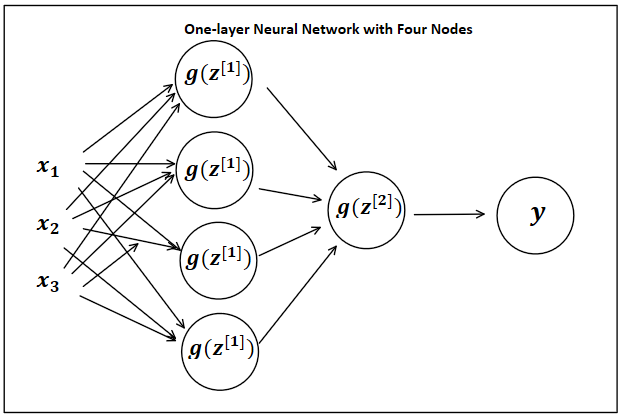

In [2]:
Image("images/shallow_nn.PNG")

In basic instances of neural networks, the logic is much less mathematically complex as it is recursive. This is why it is important to vectorize operations when building such a system, as for-loops will start to get expensive the deeper your system gets. With numpy and some simple linear algebra, the code can stay concise regardness of number of nodes or training examples. 

$\large Z^{[1]} = W^{[1]}\cdot x + b^{[1]}$ 

$\large A^{[1]} = g(Z^{[1]})$
* note: $Z^{[1]}$ can also be referred to as $a^{[0]}$

$\large Z^{[2]} = W^{[2]}\cdot A^{[1]} + b^{[2]}$ 

$\large A^{[2]} = g(Z^{[2]}) = \hat{y}$

A good question here might be: the layers make sense, but why the neurons? It looks as though each node is performing the same computation. And you'd be correct to think that if we were intializating the weights to zero, as one might do in logistic regression. This is termed as computational *symmetry*, and would just be propogating redundancies across your system.

To prevent each node from doing the same computation, we *randomly* intialize the weights in the first layer, such that each node is performing computations with different weights.

Below is a function to perform such initialization.

In [3]:
import numpy as np

def init_wb(X, y, bias=0, n_neurons=4):
    """
    Randomly initialize weights for linear function
    to pass to singular hidden layer in shallow 
    neural network.
    
    input
    -----
    x_size: int
        number of training examples (X.shape[0])
    y_size: int
        output size (Y.shape[0])
    bias : numeric
        bias term in linear model
    n_neurons: int
        number of nodes within hidden layer
        
    output
    -----
    dict of weight/bias terms
        keys: w1, w2, b1, b2
        """
    x_size = X.shape[0]
    y_size = y.shape[0]
    
    # Terms fit to first layer
    w1 = np.random.randn(n_neurons, x_size) * 1e-2
    b1 = np.ones((n_neurons, 1)) * bias
    
    # Terms to fit to output layer
    w2 = np.random.randn(y_size, n_neurons) * 1e-2
    b2 = np.ones((y_size, 1)) * bias
    
    return {'W1': w1, 'b1':b1, 'W2':w2, 'b2':b2}

## Activation 
Another important factor in building a neural network system is choosing which activation functions to apply to your linear models. I demonstrated sigmoid activation for a logistic regressor, but sigmoid tends to poorly perform on hidden layers. Neural networks tend to excel with data scaled to be centered around 0, whereas sigmoid is centered around 0.5 by defintion. This makes the hyperbolic tangent an appropriate choice for such a task, and is computed as below

$\large tanh = \frac{e^{x} - e^{-x}}{e^x + e^{-x}}$

In [4]:
import matplotlib.pyplot as plt
plt.figure()
x = np.linspace(-10, 10)
plt.plot(x, np.tanh(x), label='tanh', lw=3)
plt.plot(x, 1/(1+np.exp(-x)), label='sigmoid',lw=3)
plt.legend();

While sigmoid might not be an optimal choice for *hidden* layers, it still remains an effective choice for *output* layer if the aim is binary classification.

There are also some drawbacks to the tanh function, as both the sigmoid and the tanh will have near-zero gradients at large x and -x, thus optimization will be slow as your algorithm tries to descend the gradient. If tanh is slow, ReLU is another option

Activation functions:
* Sigmoid (0 <= x <= 1)
    * mean is not 0
    * good for binary classification output layer
* tanh (-1 <= x <= 1)
    * for large/small input, gradient very small
* Rectified linear unit  a = max(0, z)
    * default choice for NN's
    * leakly ReLU= slight slope when x < 0

## Forward Propagation

The first computational step in our neural network is to calculate our **forward propagation**, or put more simply, derive an output given an input. Using the formulas from above, our calculations will flow like

$\large Z^{[1]} \to A^{[1]} \to Z^{[2]} \to A^{[2]}$ 

In the below implementation, hidden layer activation is performed with $tanh$ and the output activation is done with sigmoid activation. Dotting that matrices `X` and `A1` with their corresponding weights with `np.dot`, our calculations are vectorized so complexity should scale well with size of training data.

In [5]:
def sigmoid(x):
    """
    Helper function to compute the sigmoid of a given array
    
    input
    -----
    x: ndarray-like, output vector of linear function
    
    output
    -----
    s: ndarray-like, sigmoid of input"""
    
    sig = 1/(1+np.exp(-x))
    return sig

def prop_forward(X, params):
    """
    Function to run forward propagation in shallow 
    neural network
    
    input
    -----
    X: ndarray 
        data to fit with shape (x_size, n_samples)
    params: dict 
        weights/biases returned from init_wb()
        
    output
    -----
    dict of z, a terms to forward propogate one hidden layer
        z1: input layer fit to linear function
        a1: tanh activation on z1
        z2: a1 activation layer fit to linear function
        a2: sigmoid function fit to a1 as output
        
    """
    
    w1 = params['W1']
    b1 = params['b1']
    w2 = params['W2']
    b2 = params['b2']
    
    # Fit first layer to linear function
    z1 = np.dot(w1, X) + b1
    # Apply activation function to first layer
    a1 = np.tanh(z1)
    # Fit output layer to resulting a1 activation
    z2 = np.dot(w2, a1) + b2
    # Run sigmoid activation on output
    a2 = sigmoid(z2)
    
    return {'Z1':z1, 'A1':a1, 'Z2':z2, 'A2':a2}

Now that we have a vectorized means of forward propagation, we define our cost function. Being that the output layer is seeing sigmoid activation, it would to appropriate to use log loss.

$ \large L(\hat{y}, y) = - [y \space log\hat{y} \space + \space (1-y)\space log(1-\hat{y}]$

A log probability loss function makes sense for a binary classifier in that:

**When $y=1: L(\hat{y}, y) = -\space log\hat{y} $**
* Thus, you want you predicted value ($\hat{y}$) to be as close to $1$ as possible

**When $y=0: L(\hat{y}, y) = -\space log(1-\hat{y})$**
* Thus, you want you predicted value ($\hat{y}$) to be as close to $0$ as possible


The corresponding cost function can be notated the sum of the loss over the samples, divided by the number of samples.


$\large J(w, b) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)} \space log(a)^{(i)} \space + \space (1-y^{(i)})\space log(1-a^{(i)}]$

In [6]:
def cross_entropy(a2, y, params):
    """
    Calculate cross-entropy cost 
    
    input
    -----
    a2: ndarray shape (1, samples)
        sigmoid activation of output layer
    y: ndarray shape(1, samples)
        true target
    params: dict
        weight/bias terms
        keys: w1, w2, b1, b2
    
    output
    -----
    float, cross entropy cost 
    """
    
    samples = y.shape[1]
    
    loss = np.add(np.multiply(np.log(a2), y), np.multiply(1-y, np.log(1-a2)))
    cost = -(1/samples) * np.sum(loss)
    
    return cost

We now have means of calculating and scoring an output, but in order to optimize our parameters, we need to find the gradients of $W$ and $b$ with respect to our loss function. 

Our forward propagation (plus our loss calculation) is performed as such:


$\large Z^{[1]} = W^{[1]}\cdot x + b^{[1]}$ 

$\large A^{[1]} = g(Z^{[1]})$

$\large Z^{[2]} = W^{[2]}\cdot A^{[1]} + b^{[2]}$ 

$\large A^{[2]} = g(Z^{[2]})$

$\large L(A^{[2]}, y)$


In [7]:
def prop_back(X, y, params, forward_prop_dict):
    """
    Compute the backward propogation across
    shallow NN with one hidden layer
    
    input
    -----
    X: ndarray 
        data to fit with shape (x_size, n_samples)
    params: dict 
        weights/biases returned from init_wb()
    forward_prop_dict: dict
        dict with keys 'z1', 'a1', 'z1', 'a2'
        
    output
    -----
    dict of gradients
        keys:
        dw1: w gradient of first layer
        db1: b gradient of first lyaer
        dw2: w gradient of second layer
        db2: b gradient of second layer
    """
    samples = X.shape[1]
    
    w1 = params['W1']
    w2 = params['W2']
    
    a1 = forward_prop_dict['A1']
    a2 = forward_prop_dict['A2']
    
    # Calculate backward propagation from output to input functions
    dz2 = a2 - y
    dw2 = (1/samples) * np.dot(dz2, a1.T)
    db2 = (1/samples) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * (1 - np.power(a1, 2))
    dw1 = (1/samples) * np.dot(dz1, X.T)
    db1 = (1/samples) * np.sum(dz1, axis=1, keepdims=True)
    
    return {'dW1':dw1, 'dW2':dw2, 'db1':db1, 'db2':db2}    

## Gradient Descent

With the ability to compute the gradients of our parameters with respect to the loss, we can recursively tune our parameters to minimize the cost function. In a gradient descent scheme, we can update the parameters of the model by the product of the gradient and some learning rate $\eta$, as below.


In [8]:
def hypertune(params, backward_prop_dict, eta = 1.2):
    """
    Tunes weight/bias terms using gradient descent for
    *one* iteration
    
    input
    -----
    prop_dict: dict
        contains w1, dw1, w2, dw2, b1, db1, b2, db2
    eta: numeric
        learning rate
        
        
    output
    -----
    dict: updated parameters
    """
    w1 = params['W1']
    b1 = params['b1']
    w2 = params['W2']
    b2 = params['b2']
    
    dw1 = backward_prop_dict['dW1']
    db1 = backward_prop_dict['db1']
    dw2 = backward_prop_dict['dW2']
    db2 = backward_prop_dict['db2']

    w1 = w1 - (eta * dw1)
    b1 = b1 - (eta * db1)
    w2 = w2 - (eta * dw2)
    b2 = b2 - (eta * db2)
    
    return {'W1':w1, 'b1':b1, 'W2':w2, 'b2':b2}

## Shallow Neural Network model

With functions to handle forward and backward propagation across the computation graph, a cost function, and gradient descent, we can bundle these functions into a model. Using scikit-learn's base classes/mixins, we can create a custom model that is compatibile with the their cross-validation functionality, among other useful features.

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ShallowNN(BaseEstimator, ClassifierMixin):
    """
    Nerual network with one hidden layer
    """
    def __init__(self, nodes=4, n_iter=1e4, eta=1.2):
        self.nodes = 4
        self.n_iter = int(n_iter)
        self.eta = eta
        self.cost_ = []
        
    def fit(self, X, y=None):
        params = init_wb(X, y, self.nodes)
        
        for i in range(0, self.n_iter):
            forward = prop_forward(X, params)
            cost = cross_entropy(forward['A2'], y, params)
            backward = prop_back(X, y, params, forward)
            params = hypertune(params, backward, eta=self.eta)
            if i % 100 == 0:
                self.cost_.append(cost)
        self.params_ = params
        self.forward_prop_ = forward
        self.backward_prop_ = backward
        return repr(self)
        
    def predict(self, X, y=None):
        try:
            getattr(self, "params_")
        except AttributeError:
            raise RuntimeError("Run .fit() on training data before .predict()")
        forward = prop_forward(X, self.params_)
        y_pred = np.array([1 if x>0.5 else 0 for x in np.squeeze(forward['A2'])])
        return y_pred
            
    def score(self, X, y=None):
        y_pred = self.predict(X)
        samples = X.shape[1]
        accuracy = (1 / samples) * (np.dot(y, y_pred.T) + np.dot(1-y, 1-y_pred.T))
        return accuracy

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [11]:
X, y = load_planar_dataset()
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T)

nn = ShallowNN()
nn.fit(X_train.T, y_train.T)

'ShallowNN(eta=1.2, n_iter=10000, nodes=4)'

In [12]:
nn.score(X_test.T, y_test.T)

array([0.69])

## Classification  
Let's test out this model on a toy dataset, using scikit's dataloading utilities. `make_moons()` is a good test dataset that doesn't have simple linear separability.

In [13]:
2000 % 1005

995

In [14]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=80**2,noise=0.3, random_state=1)
df = pd.DataFrame(X, columns=['x_0', 'x_1'])
df['y'] = y

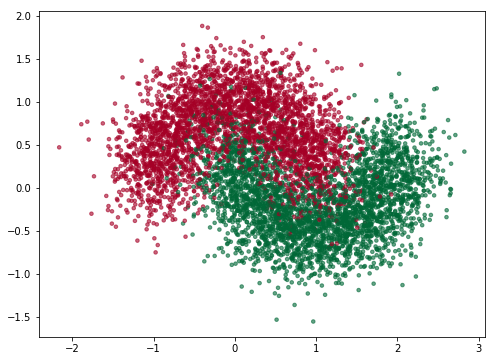

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df.x_0, df.x_1, marker='.', c=df.y, s=50, alpha=0.6, cmap=plt.cm.RdYlGn);

In [16]:
X = df.iloc[:, :2].values.T
y = df['y'].values.T.reshape(1, -1)
X.shape, y.shape

((2, 6400), (1, 6400))

To validate our model, we'll randomly sample 20% of the dataset and set it aside for testing. Rather than code this, sklearn's `train_test_split` is convenient.

* Keep mind that random sampling is not *always* appropriate for splitting up training and test sets. Depending on the type of problem, sampling sometimes needs to be stratified across discrete groupings of the data.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T)

In [18]:
nn = ShallowNN()
nn.fit(X_train.T, y_train.T)

'ShallowNN(eta=1.2, n_iter=10000, nodes=4)'

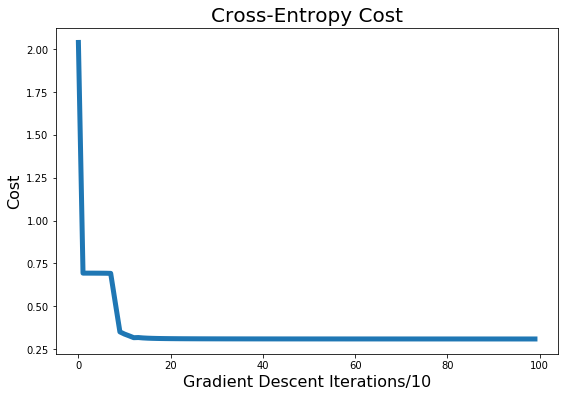

In [19]:
plt.figure(figsize=(9, 6))
plt.title('Cross-Entropy Cost', size=20)
plt.xlabel('Gradient Descent Iterations/10', size=16)
plt.ylabel('Cost', size=16)
plt.plot(np.arange(len(nn.cost_)), nn.cost_, lw=5)

Here, let's construct a meshgrid of the decision boundaries set by the classifier.

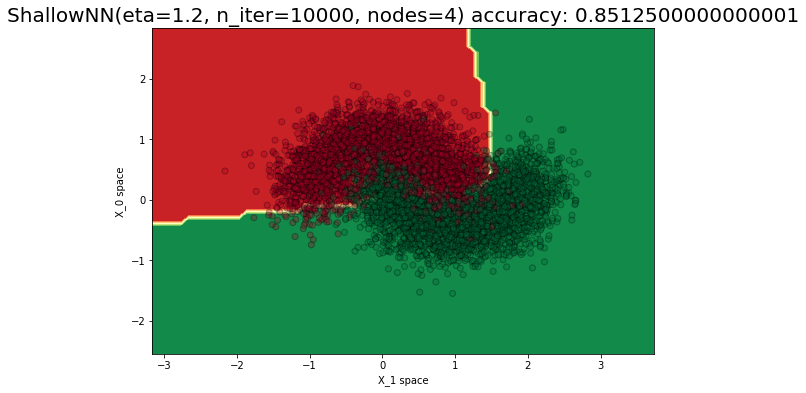

In [20]:
score = nn.score(X_test.T, y_test.T)

# get min, max values for specifying range of the grid
xax_min = X[0, :].min() - 1
xax_max = X[0, :].max() + 1
yax_min = X[1, :].min() - 1
yax_max = X[1, :].max() + 1
resolution = 0.1

# generate grid of xy space
x_grid, y_grid = np.meshgrid(np.arange(xax_min, xax_max, resolution), \
                             np.arange(yax_min, yax_max, resolution))

# run prediction on meshgrid data to generate surface of predictions
predict_surface = lambda x: nn.predict(x.T)
surface = predict_surface(np.c_[x_grid.ravel(), y_grid.ravel()])
surface = surface.reshape(x_grid.shape)

plt.figure(figsize=(9, 6))
plt.title(f"{str(nn)} accuracy: {score[0]}", size=20)
plt.ylabel('X_0 space')
plt.xlabel('X_1 space')
plt.contourf(x_grid, y_grid, surface, cmap=plt.cm.RdYlGn);
plt.scatter(X[0, :], X[1, :], c=y.ravel(), edgecolor='k',alpha=0.3, cmap=plt.cm.RdYlGn);

Despite the noise of the data, a >85% accuracy on the test set is a good starting point. But recall that theres a few user defined hyperparameters that we defined in our model: namely learning rate (eta), iterations of gradient descent (n_iter), and nodes of the system. We can plot a few of these to see trends in the set values. Once you've settled on a model you'd like to pursue and done some preliminary validation, this is when steps such as data preparation, hyperparameter tuning, and cross validation come in.

See "Model-Selection_in_SciKit-Learn.ipynb" for more.